Name: MEET DAVE

UID: 2018140015

FCI MINI PROJECT

#Objective:
###The main goal is to build a convolutional neural network model based system which can be used for detecting melanoma skin cancer. The system should classify the skin image as benign or malignant melanoma  based on the user input images.

#Dataset:
###The dataset consists of 1800 images of size 224 x 224 obtained from ISIC archives. The images are of two types - Benign and Malignant Melanoma. 
###Dataset Link: https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign.

###Dataset Size: 164 MB




Dataset  | Benign | Malignant
-------------------|--------------------|----------------
 Training      | 1152      |958
Validation       | 288       | 239
Testing       | 360     |300

###Github Link: https://github.com/MeetDave324/Melanoma-Detection-using-CNN

#Importing the Libraries



*   Importing the basic libraries first
*   Importing Image from Python Image Library for loading the image
*   Importing the required CNN libraries from keras
 


In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator
from keras import  layers

##Loading the dataset from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Creating the input data arrays and generating the **labels**

In [3]:
folder_benign_train = r'/content/drive/MyDrive/Skin Detection/train/benign'
folder_malignant_train = r'/content/drive/MyDrive/Skin Detection/train/malignant'

folder_benign_test = r'/content/drive/MyDrive/Skin Detection/test/benign'
folder_malignant_test = r'/content/drive/MyDrive/Skin Detection/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]


#### Printing the size of Arrays

In [4]:
print(X_benign.shape)
print(X_benign.shape[0])
print(X_benign_test.shape[0])
print(X_malignant.shape[0])
print(X_malignant_test.shape[0])

(1440, 224, 224, 3)
1440
360
1197
308


####Using the method to_categorical(), the input numpy array which represents different categories(2 in our case) is converted into a matrix of binary values. The matrix has number of rows equal to our input numpy array and number of columns equal to the number of classes which is 2.

In [5]:
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)

####Using data augmentationt to prevent overfitting

In [6]:
# With data augmentation to prevent overfitting 
X_train = X_train/255.
X_test = X_test/255.

####Here we are using ImageDataGenerator which is a part of keras image preprocessing library. The ImageDataGenerator will make sure that for each training epoch, we will not be passing the same images. We will be training them on slightly transformed images, which will help our model to train better. 

#### Please note, this function won't add any new images. The image count will remain same, only images will be transforemed for each epoch

#### Here we have also provided a validation_split of 0.2. So out of total images we have for training purpose, 20% will be used for validation and remaining 80% for our model training

In [7]:
datagen = ImageDataGenerator(width_shift_range=.3, 
                             height_shift_range=.3,
                             validation_split=0.2)
datagen.fit(X_train)

-----------------------------------------------
#CNN Model Architecture


The CNN Model consist of 5 Convolutional Layers with increasing filters and  valid padding followed by Batch Normalization, Activation Function and Pooling Layer. 

The main purpose of using Batch Normalization is to standardize the output of the previous convolutional layers. Batch Normalization takes place in batches and not as single input. Batch Normalization as a result makes our neural network more faster and stable

We have used rectified linear unit (relu) as our activation function to introduce non-linearity into the outpur of our neuron and MaxPooling as our pooling layer.

The fully connected layer consist of 4 Dense layer and 3 Dropout layer.
As we are doing the binary classification, we have used sigmoid activation function.

The learning rate is 0.0001 and optimizer used is adam

In [8]:
    #FCI Project 2
    #20 Epoch-->81.87% 
    #30 Epoch-->84.28%
    input_shape= (224,224,3)
    lr = 1e-4
    num_classes= 2
    init= 'normal'
    activ= 'relu'
    optim= 'adam'
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2),padding='valid',input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3),padding='valid'))
    model.add(BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3)))

    model.add(Conv2D(64, kernel_size=(3, 3),padding='valid'))
    model.add(BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3)))

    model.add(Conv2D(128, kernel_size=(3, 3),padding='valid'))
    model.add(BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(256, kernel_size=(3, 3),padding='valid'))
    model.add(BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.summary()
    model.compile(optimizer =optim ,loss = "binary_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 32)      416       
_________________________________________________________________
batch_normalization (BatchNo (None, 223, 223, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0

###This Model is trained on 20,30 and 50 Epochs.

##Model 1: 20 Epochs

### Here we are using fit_generator for training our model. We are using the datagen variable which we used for ImageDataGenerator to provide our training and validation data with batch size 64

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train,subset='training',batch_size=64),
        validation_data=datagen.flow(X_train, y_train, subset='validation',batch_size=64),
        epochs=20, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
38/38 [==============================] - 26s 638ms/step - loss: 0.5498 - accuracy: 0.7235 - val_loss: 0.8751 - val_accuracy: 0.5171
Epoch 2/20
38/38 [==============================] - 23s 609ms/step - loss: 0.4216 - accuracy: 0.8059 - val_loss: 1.2719 - val_accuracy: 0.5171
Epoch 3/20
38/38 [==============================] - 23s 609ms/step - loss: 0.4107 - accuracy: 0.7998 - val_loss: 0.9836 - val_accuracy: 0.5551
Epoch 4/20
38/38 [==============================] - 23s 605ms/step - loss: 0.3863 - accuracy: 0.8079 - val_loss: 0.8616 - val_accuracy: 0.5285
Epoch 5/20
38/38 [==============================] - 23s 605ms/step - loss: 0.4173 - accuracy: 0.7821 - val_loss: 0.5224 - val_accuracy: 0.7490
Epoch 6/20
38/38 [==============================] - 23s 608ms/step - loss: 0.3815 - accuracy: 0.8051 - val_loss: 0.5462 - val_accuracy: 0.7110
Epoch 7/20
38/38 [==============================] - 23s 610ms/step - loss: 0.3844 - accuracy: 0.8085 - val_loss: 0.5097 - val_accuracy: 0.7338

###The Obtained accuracy for our model on 20 epochs is 0.8188 and loss is 0.3659

In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 2s 30ms/step - loss: 0.3659 - accuracy: 0.8189


[0.3659246861934662, 0.81886225938797]

###Displaying the model's accuracy and loss graph 

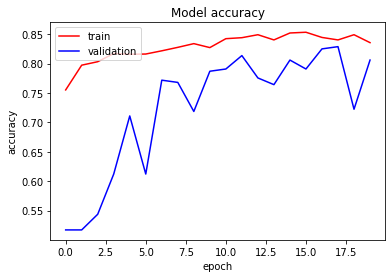

In [ ]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

From the graph we can see that the training accuracy is increasing gradually, but the validation accuracy have some ups and downs as accuracy improves gradually

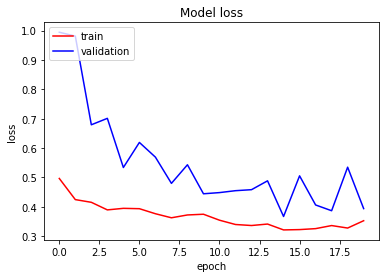

In [ ]:
# displaying the model loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

From the graph we can see that the training loss is decreasing gradually, but the validation curve have some ups and downs and loss is descreasing with each epoch

### Saving this model on google drive for future use.

In [ ]:
model_path = '/content/drive/MyDrive/FCI/Project2.h5'
model_weights_path = '/content/drive/MyDrive/FCI/ProjectWeights2.h5'

model.save(model_path)
model.save_weights(model_weights_path)
print("Saved model to disk")

Saved model to disk


##Model 2: 30 Epochs


### Here we are using fit_generator for training our model. We are using the datagen variable which we used for ImageDataGenerator to provide our training and validation data with batch size 64

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train,subset='training',batch_size=64),
        validation_data=datagen.flow(X_train, y_train, subset='validation',batch_size=64),
        epochs=30, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
33/33 [==============================] - 71s 789ms/step - loss: 0.5446 - accuracy: 0.6986 - val_loss: 0.8524 - val_accuracy: 0.5465
Epoch 2/30
33/33 [==============================] - 25s 745ms/step - loss: 0.4355 - accuracy: 0.7944 - val_loss: 1.3491 - val_accuracy: 0.5465
Epoch 3/30
33/33 [==============================] - 24s 744ms/step - loss: 0.4251 - accuracy: 0.8151 - val_loss: 1.5799 - val_accuracy: 0.5465
Epoch 4/30
33/33 [==============================] - 24s 741ms/step - loss: 0.3872 - accuracy: 0.8255 - val_loss: 0.9052 - val_accuracy: 0.5598
Epoch 5/30
33/33 [==============================] - 25s 745ms/step - loss: 0.3769 - accuracy: 0.8306 - val_loss: 1.1671 - val_accuracy: 0.5541
Epoch 6/30
33/33 [==============================] - 25s 747ms/step - loss: 0.3355 - accuracy: 0.8435 - val_loss: 0.8568 - val_accuracy: 0.5636
Epoch 7/30
33/33 [==============================] - 25s 747ms/step - loss: 0.3406 - accuracy: 0.8332 - val_loss: 0.5852 - val_accuracy: 0.6319

###The Obtained accuracy for our model on 30 epochs is 0.8428 and loss is 0.3564

In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 2s 37ms/step - loss: 0.3565 - accuracy: 0.8428


[0.35645580291748047, 0.8428143858909607]

###Displaying the model's accuracy and loss graph 

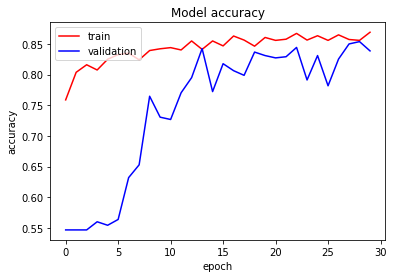

In [ ]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

From the graph we can see that the training accuracy is increasing gradually, but the validation curve have some ups and downs as accuracy improves gradually

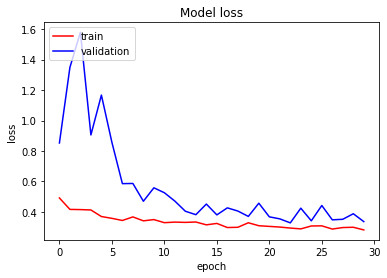

In [ ]:
# displaying the model loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

From the graph we can see that the training loss is decreasing gradually, but the validation curve have some ups and downs and loss is descreasing with each epoch

### Saving this model on google drive for future use.

In [ ]:
model_path = '/content/drive/MyDrive/FCI/Project230E8428.h5'
model_weights_path = '/content/drive/MyDrive/FCI/ProjectWeights230E8428.h5'

model.save(model_path)
model.save_weights(model_weights_path)
print("Saved model to disk 30 EPOCHS")

Saved model to disk 30 EPOCHS


##Model 3: 50 Epochs

### Here we are using fit_generator for training our model. We are using the datagen variable which we used for ImageDataGenerator to provide our training and validation data with batch size 64

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train,subset='training',batch_size=64),
        validation_data=datagen.flow(X_train, y_train, subset='validation',batch_size=64),
        epochs=50, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
33/33 [==============================] - 25s 765ms/step - loss: 0.2776 - accuracy: 0.8692 - val_loss: 0.4168 - val_accuracy: 0.8463
Epoch 2/50
33/33 [==============================] - 25s 747ms/step - loss: 0.2987 - accuracy: 0.8597 - val_loss: 0.3681 - val_accuracy: 0.8273
Epoch 3/50
33/33 [==============================] - 25s 748ms/step - loss: 0.2562 - accuracy: 0.8810 - val_loss: 0.6305 - val_accuracy: 0.7362
Epoch 4/50
33/33 [==============================] - 25s 751ms/step - loss: 0.2672 - accuracy: 0.8806 - val_loss: 0.5134 - val_accuracy: 0.6983
Epoch 5/50
33/33 [==============================] - 25s 749ms/step - loss: 0.2808 - accuracy: 0.8654 - val_loss: 0.3230 - val_accuracy: 0.8406
Epoch 6/50
33/33 [==============================] - 25s 748ms/step - loss: 0.2583 - accuracy: 0.8725 - val_loss: 0.5218 - val_accuracy: 0.8254
Epoch 7/50
33/33 [==============================] - 25s 746ms/step - loss: 0.2840 - accuracy: 0.8716 - val_loss: 0.9309 - val_accuracy: 0.6338

###The Obtained accuracy for our model on 50 epochs is 0.8218 and loss is 0.4308

In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 1s 31ms/step - loss: 0.4309 - accuracy: 0.8219


[0.4308534264564514, 0.8218562602996826]

###Displaying the model's accuracy and loss graph 

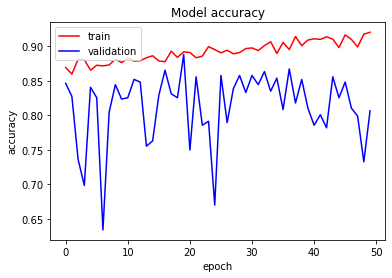

In [ ]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

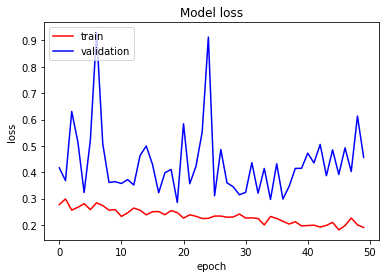

In [ ]:
# displaying the model loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Saving this model on google drive for future use.

In [ ]:
model_path = '/content/drive/MyDrive/FCI/Project250E8218.h5'
model_weights_path = '/content/drive/MyDrive/FCI/ProjectWeights250E8218.h5'

model.save(model_path)
model.save_weights(model_weights_path)
print("Saved model to disk 50 EPOCHS")

Saved model to disk 50 EPOCHS


#Model Performance

## Observation Table:

No.of Epochs  | Accuracy | Loss
-------------------|--------------------|----------------
 20      | 0.8189     |0.3659
  30       | 0.8428     | 0.3564
  50       | 0.8218    |0.4308

### From the observation table we can see that we obtained maximum accuracy and minimum loss when our model was trained on 30 Epochs. So for our model performance analysis we will be considering that model only

#### Loading the model with 30 Epochs for perfomance evaluation

In [17]:
from keras.models import Sequential, load_model
# Define Path
model_path = '/content/drive/MyDrive/FCI/Project230E8428.h5'
model_weights_path = '/content/drive/MyDrive/FCI/ProjectWeights230E8428.h5'
# Load the pre-trained models
model = load_model(model_path)
model.load_weights(model_weights_path)

#### Printing the Confusion Matrix

In [18]:
y_pred = model.predict(X_test)
# Creating the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
# Assigning columns names
print('Confusion Matrix')
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
print(cm_df)

Confusion Matrix
                 Predicted Negative  Predicted Positive
Actual Negative                 280                  80
Actual Positive                  25                 283


Therefore from confusion matrix we can calculate Precision and Recall for our Model

Precision =  283/(80 + 283) = 0.779

Recall =  283/(283 + 25) = 0.918

#### Printing the Classification Report

In [20]:
from sklearn.metrics import classification_report

print('Classification Report')
target_names = ['Benign', 'Malignant']
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Benign       0.92      0.78      0.84       360
   Malignant       0.78      0.92      0.84       308

    accuracy                           0.84       668
   macro avg       0.85      0.85      0.84       668
weighted avg       0.85      0.84      0.84       668



From the classification we can see that the precision for Benign and Malignant melanoma is 0.92 & 0.78 respectively. Similary Recall for Benign and Malignant melanoma is 0.78 & 0.92 respectively.

###Testing our model on 1 Benign and 1 Malignant Image


##### Providing the image location

In [21]:
location1= r'/content/drive/MyDrive/Skin Detection/test/benign/5.jpg'
location2 = r'/content/drive/MyDrive/Skin Detection/test/malignant/1156.jpg'

##### Function for image preprocessing

In [22]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [23]:
def Transfername(answer):
    if answer==0:
        return "Benign"
    else:
        return "Malignant"

#### Passing Benign Image to our Model

###### Processing the Image

In [24]:
image = read(location1)
f_image = np.array(image, dtype='uint8')
f_image=f_image/255
t_image=np.expand_dims(f_image,axis=0)

###### Melanoma Prediction 

In [25]:
ans= model2.predict(t_image)
print(ans)
result = ans[0]
answer = np.argmax(result)
print(Transfername(answer))

[[0.6978812  0.29318818]]
Benign


###### Displaying the Image

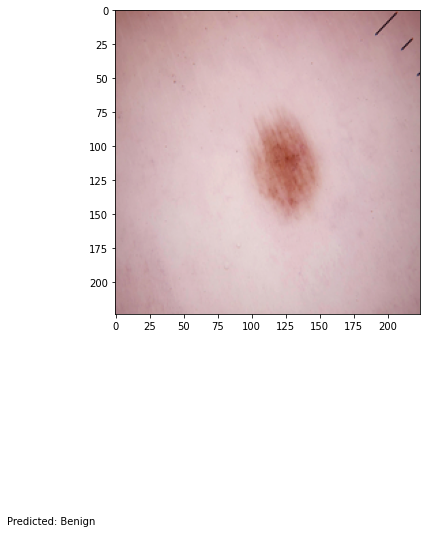

In [26]:
figure=plt.figure(figsize=(12,10))
ax=figure.add_subplot(121)
ax.imshow(f_image)
#plt.title()
plt.figtext(0,0,"Predicted: "+Transfername(answer))
plt.show()

#### Passing Melanoma Image to our Model

###### Processing the Image

In [27]:
image = read(location2)
f_image = np.array(image, dtype='uint8')
f_image=f_image/255
t_image=np.expand_dims(f_image,axis=0)

###### Melanoma Prediction 

In [28]:
ans= model2.predict(t_image)
print(ans)
result = ans[0]
answer = np.argmax(result)
print(Transfername(answer))

[[0.2448845 0.7669849]]
Malignant


###### Displaying the Image

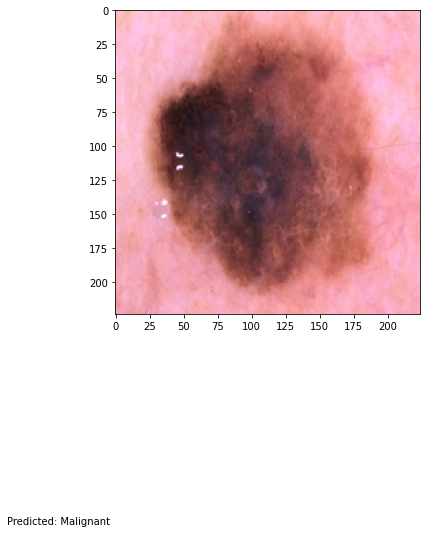

In [29]:
figure=plt.figure(figsize=(12,10))
ax=figure.add_subplot(121)
ax.imshow(f_image)
#plt.title()
plt.figtext(0,0,"Predicted: "+Transfername(answer))
plt.show()

##Conclusion
We created a CNN model for melanoma detection, where the CNN model can predict whether the image provided is benign or malignant melanoma.

The CNN model consist of 5 Convolutional layers followed by Batch Normalization, Relu Activation Function and Max Pooling Layer. It consist of 4 Dense and 3 Dropout layers in fully connect network. The main purpose of using Batch Normalization was to normalize the output and speed up the training 

The model was trained on different epochs and we observed maximum accuracy of 0.8428 and minimum loss of 0.3564 on 30 Epochs

On both 20 and 30 Epochs from the training graph we can see that model accuracy is increasing gradually however few drops and peaks are observed for the validation curve. As the difference in training and validation accuracy is small, we can infer that our model is not overfitting

The observed precision is 0.779 and recall is 0.92
